In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob


In [2]:
amazon_reviews = pd.read_csv("amazon_cells_labelled.txt",sep="\t",header=None)

In [3]:
amazon_reviews.columns = ['Review','Label']

In [20]:
bad_keywords = ['no', 'waste', 'not', 'disappointed', 'junk', 'problem']

for key in bad_keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    amazon_reviews[str(key)] = amazon_reviews.Review.str.contains(
        ' ' + str(key) + ' '
    )
    
    
amazon_reviews.sample(15)

,Review,Label,no,waste,not,disappointed,only,junk,problem
256,"The cable looks so thin and flimsy, it is scary.",True,False,False,False,False,False,False,False
573,I am very happy,False,False,False,False,False,False,False,False
543,Don't buy this product.,True,False,False,False,False,False,False,False
648,"When I placed my treo into the case, not only ...",True,False,False,True,False,True,False,False
364,It definitely was not as good as my S11.,False,False,False,True,False,False,False,False
344,Worst customer service.,True,False,False,False,False,False,False,False
323,I was able to do voice dialing in the car with...,False,True,False,False,False,False,False,False
109,I purcashed this for the car charger and it do...,True,False,False,True,False,False,False,False
260,Good product - incredible value.,False,False,False,False,False,False,False,False
951,Very much disappointed with this company.,True,False,False,False,True,False,False,False


In [23]:
amazon_reviews['Label'] = (amazon_reviews['Label'] == True)

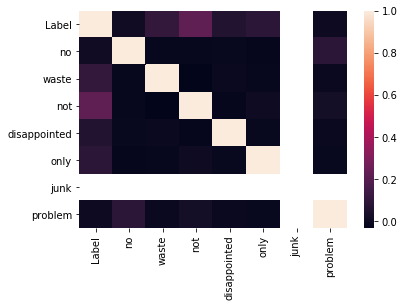

In [24]:
sns.heatmap(amazon_reviews.corr())

In [25]:
data = amazon_reviews[bad_keywords + ['Label']]
target = amazon_reviews['Review']

In [26]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of bad reviews out of {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of bad reviews out of 1000 points : 991


In [27]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [28]:
# Test your model with different holdout groups.

from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 20% Holdout: 0.0
Testing on Sample: 0.009


In [30]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=2)

C:\Users\dimit\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=2.
  % (min_groups, self.n_splits)), Warning)


array([ 0.0030303,  0.       ])